**Data Cleaning**

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [4]:
import os

In [6]:
os.getcwd()

'C:\\Users\\USER\\Documents\\Data science and Machine learning\\Projects\\Real Estate price Prediction Project'

In [8]:
os.listdir()

['.ipynb_checkpoints', 'Bengaluru_House_Data.csv', 'Data Modelling.ipynb']

In [12]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [14]:
df1.shape

(13320, 9)

In [18]:
df1.groupby('area_type')['area_type'].agg('count')
#The code is grouping the data in df1 by the values in the 'area_type' column, then counting how many entries are present in each group for the 'area_type' column.

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [20]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()
#The code removes the columns 'area_type', 'society', 'balcony', and 'availability' from the df1 DataFrame and stores the result in df2. Then, the first 5 rows of df2 are displayed for inspection.

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [24]:
df2.isnull().sum()
#This code gives you a list of how many missing (NaN) values are present in each column of the df2 DataFrame.

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [28]:
df3 = df2.dropna()
df3.isnull().sum
#df2.dropna() removes all rows with missing values from df2 and stores the result in df3.
#df3.isnull().sum() confirms that there are no missing values left in df3 by showing the count of missing values in each column (which should all be zero).

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [32]:
df3.shape

(13246, 5)

In [46]:
df3['size'].unique()
#This code retrieves and displays all the unique values present in the 'size' column of df3. 

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [52]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
#The corrected code will create a new column 'bhk' in df3, which extracts the number of bedrooms (BHK) from the 'size' column.

C:\Users\USER\AppData\Local\Temp\ipykernel_12200\2222900254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [56]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [58]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [64]:
df3[df3.bhk>20]
#this line of code returns a new DataFrame that consists of only the rows from df3 where the 'bhk' column has values greater than 20.

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [66]:
df3. total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [70]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
# is_float(x) returns True if x can be converted to a float, and False otherwise.
        

In [80]:
df3[~df3['total_sqft'].apply(is_float)]. head(10)
# the line of code filters df3 to show the first 10 rows where the total_sqft column contains values that cannot be converted to floats.

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [85]:
def convert_sqft_to_num(x):
    tokens = x.split ('-')
    if len (tokens) == 2:
        return (float (tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
#The function convert_sqft_to_num is meant to handle square footage values that may be a single number or a range (e.g., "1000-1200"). It calculates and returns the average for ranges or converts single values directly to floats. If it encounters an error during conversion, it should return a default value'.

In [87]:
convert_sqft_to_num('2166')

2166.0

In [89]:
convert_sqft_to_num('1042 - 1105')

1073.5

In [105]:
df4= df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(15)

#this code copies df3 to df4, applies a conversion function to the total_sqft column to handle different formats of square footage values, and then shows the first 15 rows of the updated DataFrame.

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [103]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

Feature Engineering

In [116]:
df5 = df4.copy()
df5["price_per_sqft"] = df5['price']*100000/df5['total_sqft']
df5.head()

#The code creates a copy of the DataFrame df4, adds a new column to calculate the price per square foot based on the price and total square footage, and displays the first 5 rows of the updated DataFrame.


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [122]:
len(df5.location.unique())
#This line of code calculates and returns the number of unique locations in the location column of the df5 DataFrame.

1304

In [138]:
df5['location'] = df5['location'].apply(lambda x: x.strip())

location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats
#This code cleans up the location column by removing extra spaces, then groups the DataFrame by the unique values in the location column and counts how many times each location appears. The results are stored in location_stats, sorted by frequency in descending order.

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [140]:
len(location_stats [location_stats<=10])
#This code counts how many unique locations have 10 or fewer occurrences in the location_stats Series.

1052

In [144]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10
#This code filters the location_stats Series to keep only locations with 10 or fewer occurrences and stores the result in location_stats_less_than_10, then displays it.

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [146]:
len(df5.location.unique())
#This code calculates and returns the total number of unique locations in the location column of the df5 DataFrame.

1293

In [152]:
df5.location = df5.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len (df5.location.unique())
#The code replaces rare locations (those with 10 or fewer occurrences) in the location column with 'other', then calculates and returns the total number of unique locations after the modification.

242

In [156]:
df5.head(15)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


**Outlier detection or removal**

In [159]:
df5[df5.total_sqft/df5.bhk<300].head()
#The code filters the df5 DataFrame to find properties where the average square footage per BHK is less than 300, indicating cramped spaces. It then displays the first 5 rows of the filtered data.

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [161]:
df5.shape

(13246, 7)

In [169]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape
#the entire line of code creates a new DataFrame df6 that excludes rows where the average square footage per bedroom is less than 300 and then returns the shape (dimensions) of this new DataFrame.

(12502, 7)

In [171]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [189]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()  # Correct method for creating an empty DataFrame
    for key, subdf in df.groupby('location'):
        n = np.mean(subdf.price_per_sqft)  # Mean of price_per_sqft
        st = np.std(subdf.price_per_sqft)  # Standard deviation of price_per_sqft
        # Filter out outliers within one standard deviation from the mean
        reduced_df = subdf[(subdf.price_per_sqft > (n - st)) & (subdf.price_per_sqft <= (n + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)  # Concatenate filtered data
    return df_out

df7 = remove_pps_outliers(df6)  # Apply the function to df6
df7.shape # Print the shape of the resulting DataFrame

#The remove_pps_outliers function removes outliers from the 'price_per_sqft' column in a DataFrame df, based on the location. It groups the data by 'location', calculates the mean and standard deviation for each group, and then filters out the rows where 'price_per_sqft' is outside one standard deviation from the mean. The function concatenates the filtered data from each location into a new DataFrame df_out and returns this DataFrame, which has the outliers removed.

(10241, 7)

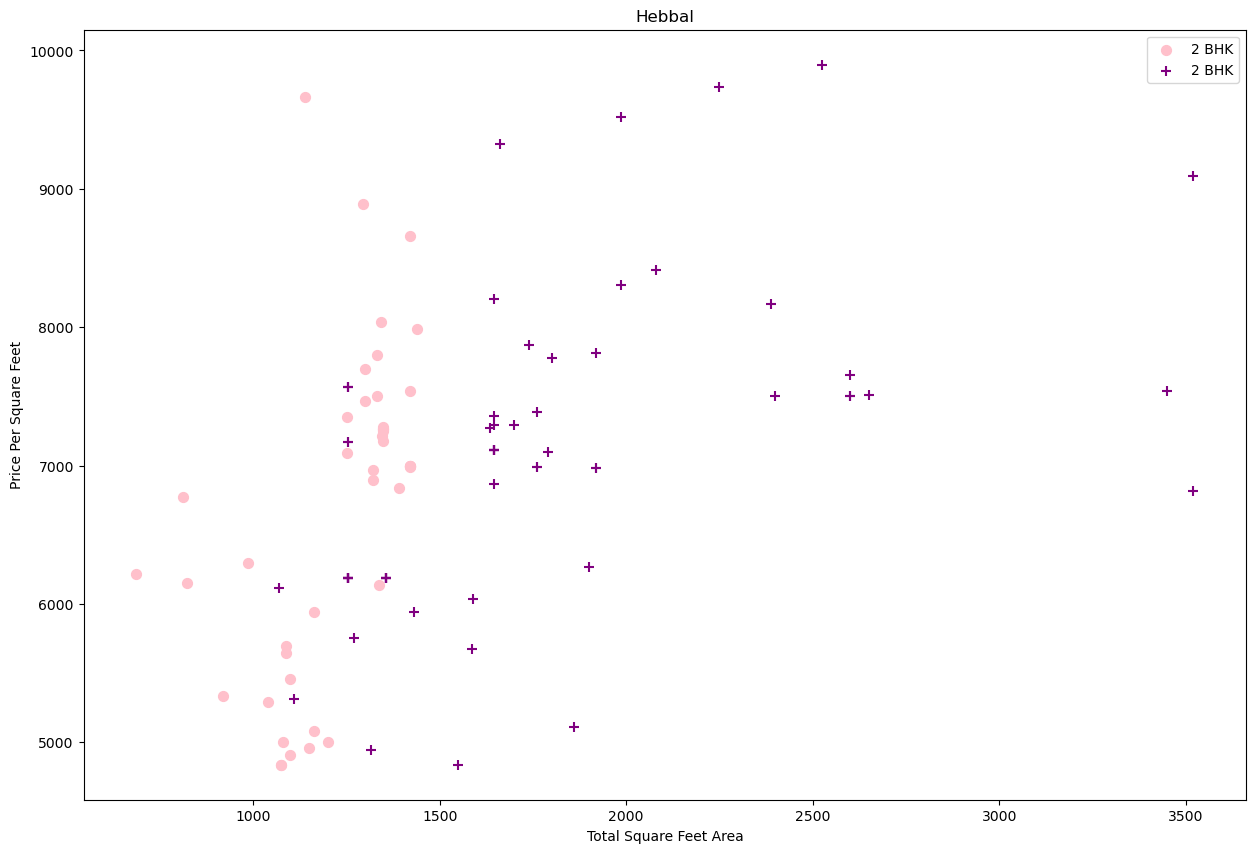

In [225]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color = 'pink' , label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, marker = '+', color = 'purple' , label='2 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Hebbal")

#The function plot_scatter_chart creates a scatter plot for comparing 2 BHK and 3 BHK apartments within a specified location. It uses the DataFrame df to filter the data by location and bedroom count, then plots the total square feet against the price per square feet for each type of apartment. The 2 BHK apartments are represented by pink dots, while 3 BHK apartments are represented by purple '+' markers. The plot includes labeled axes, a title corresponding to the location, and a legend to differentiate between the apartment types.


In [229]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values)
    
    return df.drop(exclude_indices, axis='index')

# Example usage
df8 = remove_bhk_outliers(df7)
df8.shape

#This function is like a filter for a list of properties to remove those with unusually low prices compared to similar properties. It looks at properties grouped by their number of bedrooms and calculates the average price for each group. It then checks if there are properties with prices lower than the average price of properties with one less bedroom (if there are enough properties to make the comparison meaningful). If so, it removes these low-priced properties from the list and returns the updated list of properties.

(7329, 7)

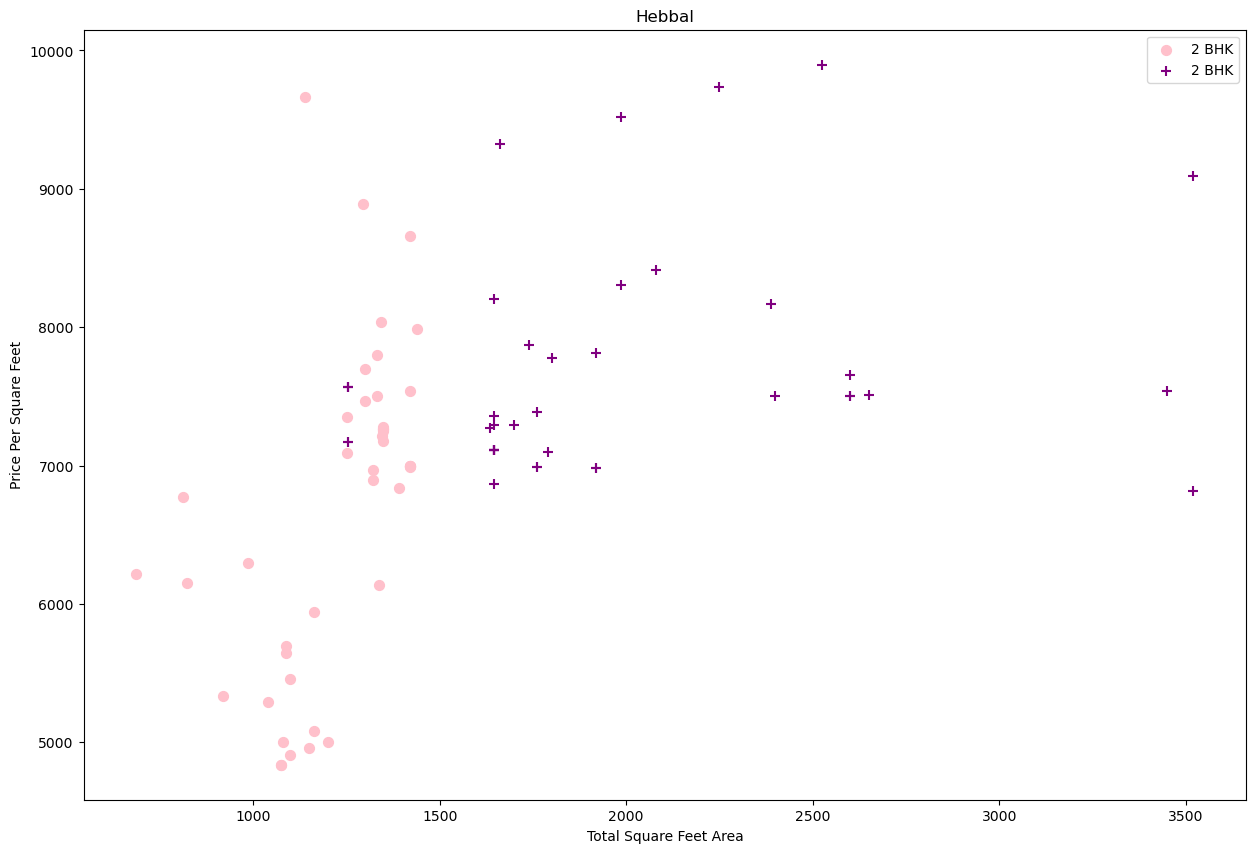

In [231]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

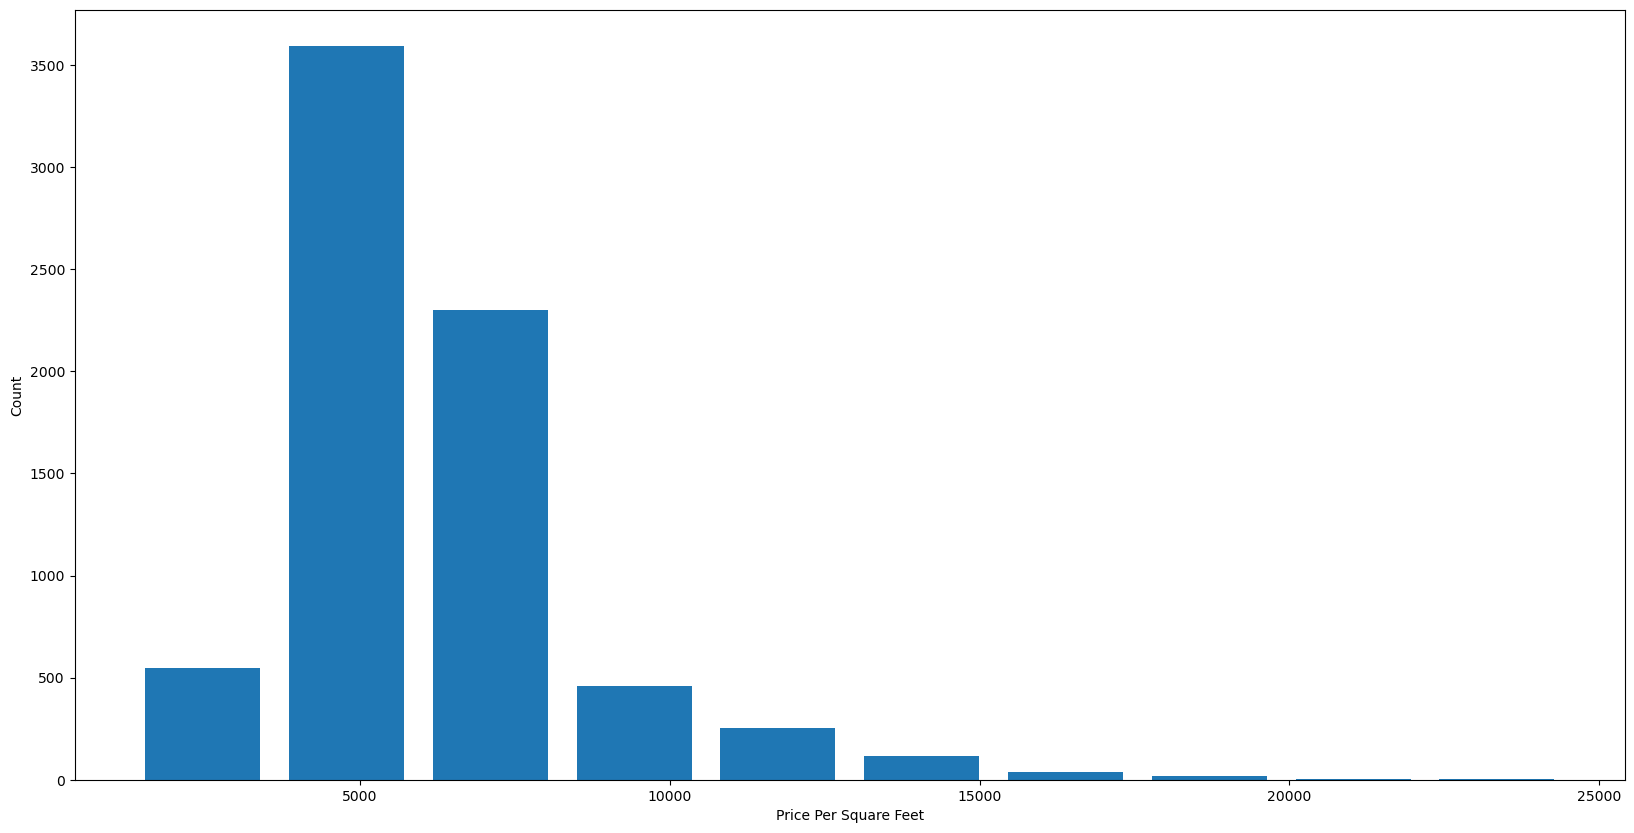

In [241]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

#This code generates a histogram that shows the distribution of property prices per square foot. It helps to visualize how frequently different price ranges occur within the dataset.


In [243]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [247]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

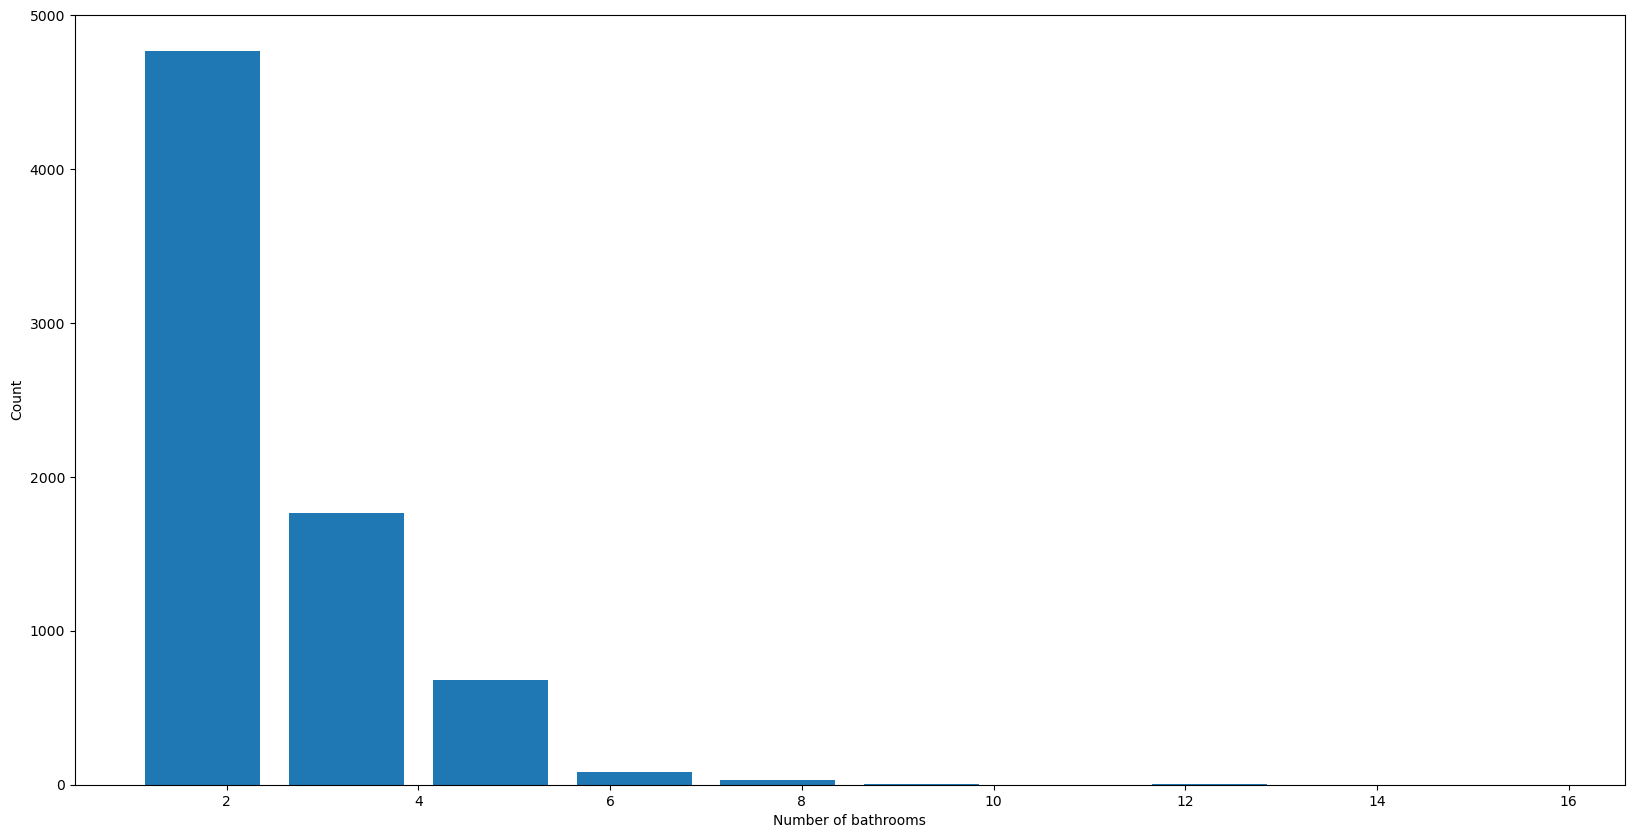

In [256]:
plt.hist(df8.bath, rwidth = 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [258]:
df8[df8.bath>df8.bhk+2]
#This code looks for properties where the number of bathrooms is significantly higher than the number of rooms (bedrooms, halls, kitchens).

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [262]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [266]:
df10 = df9.drop(['size', 'price_per_sqft'], axis = 'columns')
df10.shape
df10.head(10)
        

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,368.0,4
8,1st Phase JP Nagar,1875.0,3.0,167.0,3
9,1st Phase JP Nagar,1500.0,5.0,85.0,5
10,1st Phase JP Nagar,2065.0,4.0,210.0,3


**Model building**

In [290]:
#Machine learning model cannot interprete text data
#Converting text collumn into numeric column using one hot encoding (dummies), using panda dummies
#One-hot encoding is a way of turning categorical data (things that are labels, like colors, locations, or categories) into numbers that a machine learning model can understand.
dummies = pd.get_dummies(df10.location).astype(int)
dummies.head(3)

#This code converts the location column in df10 into multiple binary columns, where each column represents a unique location, and the values indicate whether a particular row (property) belongs to that location (1 if true, 0 if false).

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [292]:
df11 = pd.concat([df10, dummies. drop('other', axis= 'columns')], axis = 'columns')
df11.head(3)

#concatenation refers to combining two or more sets of data side by side (adding columns) or one on top of the other (adding rows).
#This line of code creates a new DataFrame, df11, by combining the original data from df10 with the one-hot encoded columns from dummies, excluding the 'other' column.


,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [294]:
df12 = df11.drop ('location', axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [296]:
# Model building can start
df12.shape

(7251, 245)

In [302]:
# X variable should only contain, independent variables, dependent variable = price)
X = df12.drop('price', axis = 'columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [304]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [308]:
# you always divde data set into training and test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 10)
#X: Represents the feature data (input variables), which are the independent variables used to predict the target.
# y: Represents the target data (output variable), which is the dependent variable you want to predict.
# test_size=0.2: This specifies the proportion of the dataset to be used as the test set. In this case, 20% of the data will be used for testing, and 80% will be used for training the model.
# This ensures that the split of the data is reproducible. If you set random_state to a particular value (like 10), every time you run the code, you’ll get the same train-test split.
# This code splits your dataset into four parts: X_train and y_train for training the model, and X_test and y_test for testing it. The test set is 20% of the data, and the random split is controlled by the random_state to ensure consistent results each time the code is run.

In [316]:
#Linear Regression model
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

#This code trains a linear regression model to learn from training data (X_train, y_train) and then evaluates how well it performs on unseen test data (X_test, y_test) by calculating the R-squared score. 

0.8452277697874312

In [322]:
#K fold cross validation K-Fold Cross Validation is a technique used in machine learning to evaluate how well a model performs on different sets of data. It helps ensure that the model isn't just performing well by chance on one particular set of data
#If you have a dataset and you use 5-fold cross-validation: The data is split into 5 parts.The model is trained 5 times, each time using a different 4 parts for training and the remaining 1 part for testing.You then calculate the average score from the 5 test sets to get a more reliable evaluation of your model's performance.
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state = 0)

cross_val_score(LinearRegression(), x,y, cv=cv)

#ShuffleSplit is used for generating training and testing indices for cross-validation, 
#while cross_val_score is used to evaluate the performance of a model.
#n_splits=5: This specifies that the data should be split into 5 different train-test sets.
#test_size=0.2: This indicates that 20% of the data should be used as the test set in each split.
#random_state=0: This sets the seed for the random number generator, ensuring that the splits are reproducible.
#The code performs cross-validation on a linear regression model using a ShuffleSplit strategy. It splits the dataset into training and testing sets 5 times, with each split having 20% of the data as the test set. The performance of the model is evaluated for each split, and cross-validation scores are computed to assess the model's effectiveness.


array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [355]:
# GridSearchCV is a method used to find the best combination of parameters for a machine learning model. 

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

def find_best_model_using_gridsearchcv(X, y):
    # Normalize data for models that require it
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                # Remove 'normalize' parameter, as it's deprecated
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X_scaled, y)  # Use the normalized data
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Example function call
find_best_model_using_gridsearchcv(X, y)



,model,best_score,best_params
0,linear_regression,0.818354,"{'fit_intercept': True, 'positive': False}"
1,lasso,0.788752,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.731217,"{'criterion': 'squared_error', 'splitter': 'be..."


### Purpose of the Code:
The code is designed to test different machine learning models and their settings (called hyperparameters) to find the best-performing model for a given dataset using a method called **GridSearchCV**. This involves searching for the best combination of hyperparameters for each model and comparing their performance.

### Breakdown of the Code:

1. **Imports**:
   - `GridSearchCV`: A method to search for the best parameters for a model using cross-validation.
   - `Lasso`: A linear regression model that applies L1 regularization to avoid overfitting.
   - `DecisionTreeRegressor`: A model that predicts outcomes by splitting data into tree-like structures.
   - `StandardScaler`: A tool to standardize the dataset by removing the mean and scaling to unit variance.

2. **Function Definition** (`find_best_model_using_gridsearchcv`):
   This function will take in the dataset (`X` for features and `y` for target) and find the best machine learning model and hyperparameters for it.

3. **Normalizing the Data**:
   ```python
   scaler = StandardScaler()
   X_scaled = scaler.fit_transform(X)
   ```
   This step uses `StandardScaler` to normalize the dataset, ensuring that all the features (columns in `X`) have a similar range, which helps certain models perform better.

4. **Defining Models and Their Parameters**:
   ```python
   algos = {
       'linear_regression': {
           'model': LinearRegression(),
           'params': {
               'fit_intercept': [True, False],
               'positive': [True, False]
           }
       },
       'lasso': {
           'model': Lasso(),
           'params': {
               'alpha': [1, 2],
               'selection': ['random', 'cyclic']
           }
       },
       'decision_tree': {
           'model': DecisionTreeRegressor(),
           'params': {
               'criterion': ['squared_error', 'friedman_mse'],
               'splitter': ['best', 'random']
           }
       }
   }
   ```
   Three models are being considered:
   - **Linear Regression**: This model tries to fit a straight line through the data points.
     - Parameters being tested: whether to fit an intercept, and whether to enforce positive coefficients.
   - **Lasso Regression**: A linear model that applies regularization to prevent overfitting.
     - Parameters being tested: different values for the `alpha` parameter (which controls the strength of regularization) and the method for selecting features.
   - **Decision Tree Regressor**: A model that splits data into decision trees to predict outcomes.
     - Parameters being tested: how to measure the quality of a split (`criterion`) and which splitting strategy to use (`splitter`).

5. **Cross-Validation Setup**:
   ```python
   cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
   ```
   The data is split 5 times into training and testing sets. Each time, 80% of the data is used for training, and 20% is used for testing.

6. **Loop Through Models**:
   ```python
   for algo_name, config in algos.items():
       gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
       gs.fit(X_scaled, y)
       scores.append({
           'model': algo_name,
           'best_score': gs.best_score_,
           'best_params': gs.best_params_
       })
   ```
   The loop goes through each model:
   - **GridSearchCV** is used to try out all possible combinations of parameters for each model.
   - The model is trained and tested, and the best score and parameters are recorded in the `scores` list.

7. **Return Results**:
   ```python
   return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
   ```
   The function returns a summary of the best scores and parameters for each model in a table (a `DataFrame`), which shows which model performed the best and with which settings.

### Summary:
This code helps find the best-performing model by testing different machine learning models (Linear Regression, Lasso Regression, and Decision Tree Regressor) and their settings using **GridSearchCV**. The dataset is normalized, models are trained and evaluated with different parameters, and the best scores and settings are stored and displayed in a table. This process i
s known as **hyperparameter tuning** and is useful for improving model performance.ng which model and parameter combination achieved the highest score.

In [380]:
def predict_price(location, sqft, bath, bhk):
    # Create a DataFrame with the same feature names as the training data
    feature_names = list(X.columns)  # Assuming X is your training DataFrame with feature names
    loc_index = feature_names.index(location)  # Find the index of the location in feature names

    # Create a DataFrame with all features
    x = np.zeros(len(feature_names))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    # Convert the feature array to a DataFrame
    x_df = pd.DataFrame([x], columns=feature_names)

    # Make prediction
    return lr_clf.predict(x_df)[0]

#This function is designed to predict the price of a house based on its location, size, number of bathrooms, and number of bedrooms. It creates a feature array that represents the house's characteristics, sets the location feature, and then uses a pre-trained machine learning model (lr_clf) to predict and return the house price. The function simplifies the process of making predictions by handling the details of how the input data is structured and used by the model.

In [382]:
predict_price ('Indira Nagar', 1000,3,3)

184.58430202033463

In [384]:
predict_price ('Indira Nagar', 1000,2,2)

181.2781548400685

In [386]:
predict_price ('Indira Nagar', 1000,2,3)

179.50527707582378

In [394]:
import pickle
with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf,f)

#The code snippet saves a trained machine learning model (lr_clf, a LinearRegression model) to a file called 'banglore_home_prices_model.pickle'. By using the pickle library, the model is serialized and written to the file, allowing you to later load and use this model without having to retrain it. This is useful for saving and sharing models or for deploying them in production environments.

In [398]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open ("columns.json", "w") as f:
    f.write(json.dumps(columns))